In [1]:
# generate PCA with the response genes at 3D and then the healthy samples

In [2]:
import os, pandas, supervenn, matplotlib_venn

In [3]:
import venny4py, venny4py.venny4py

In [4]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# user-defined variables

In [5]:
results_dir = '/Users/adrian/research/akureyri/results/sleuth_pipeline/'

# read info

In [6]:
elements = os.listdir(results_dir)
working_files = [element for element in elements if 'formatted' in element]
print(working_files)

response_genes = {}
for file in working_files:
    label = file.split('.formatted')[0]
    input_file = results_dir + file
    df = pandas.read_csv(input_file, sep='\t', index_col=0)
    genes = df.index.to_list()
    response_genes[label] = genes
    print(label, len(genes))

['effect_culture_day14.formatted_results.tsv', 'effect_culture_day2.formatted_results.tsv', 'effect_time_3D.formatted_results.tsv', 'effect_time_2D.formatted_results.tsv']
effect_culture_day14 399
effect_culture_day2 1487
effect_time_3D 654
effect_time_2D 111


# Venn diagram on two factors

all sets 1920
all culture 1729
all time 746


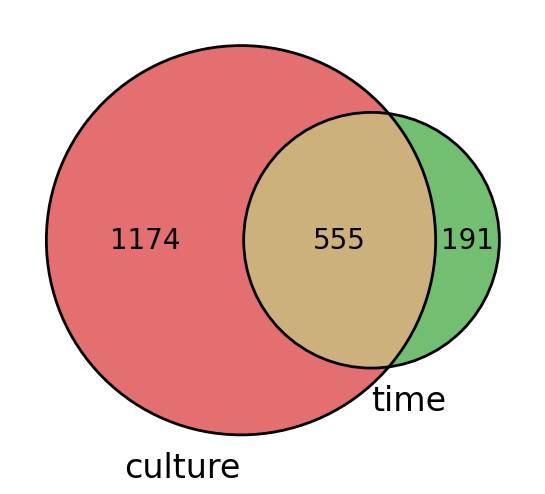

In [7]:
a = set(response_genes['effect_culture_day2'])
b = set(response_genes['effect_culture_day14'])
c = set(response_genes['effect_time_2D'])
d = set(response_genes['effect_time_3D'])

union = a.union(b, c, d)
print('all sets', len(list(union)))

union_culture = a.union(b)
print('all culture', len(list(union_culture)))

union_time = c.union(d)
print('all time', len(list(union_time)))

matplotlib_venn.venn2(subsets=(union_culture, union_time),
                      set_labels=('culture', 'time'), 
                      set_colors=('tab:red', 'tab:green'),
                      alpha=2/3)
matplotlib_venn.venn2_circles(subsets=(union_culture, union_time))  

matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('venn_broad.svg')

# venn diagrams on all conditions

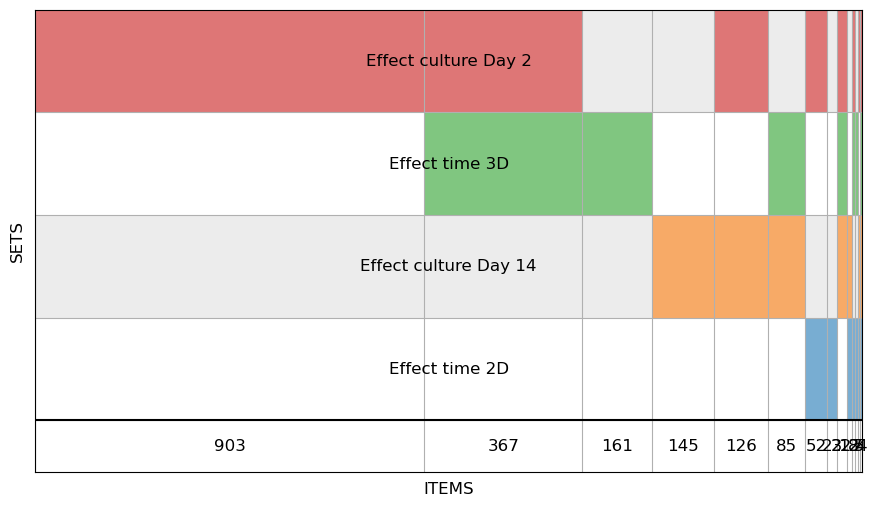

In [8]:
sets = [a, b, c, d]
labels = ['Effect culture Day 2', 'Effect culture Day 14', 'Effect time 2D', 'Effect time 3D']
mso = supervenn.supervenn(sets, labels,
                          side_plots=False, chunks_ordering='size', sets_ordering='size',
                          reverse_sets_order=False, fontsize=12)

matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('supervenn.001.svg')

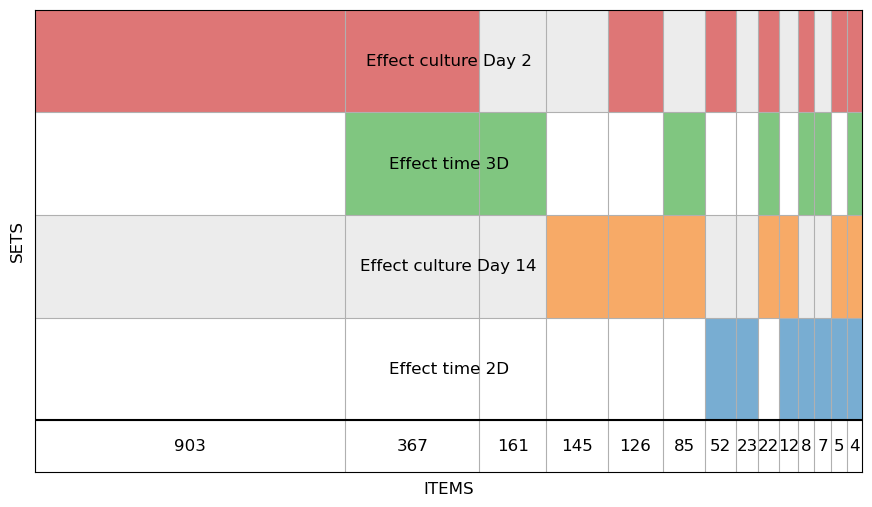

In [9]:
sets = [a, b, c, d]
labels = ['Effect culture Day 2', 'Effect culture Day 14', 'Effect time 2D', 'Effect time 3D']
mso = supervenn.supervenn(sets, labels,
                          side_plots=False, chunks_ordering='size', sets_ordering='size', widths_minmax_ratio=0.05,
                          reverse_sets_order=False, fontsize=12)

matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('supervenn.002.svg'

In [10]:
effect_culture_exclusive_t2 = list(mso.chunks[frozenset([0])])
print(len(effect_culture_exclusive_t2))

list126 = list(mso.chunks[frozenset([0, 1])])
list22 = list(mso.chunks[frozenset([0, 1, 3])])
list5 = list(mso.chunks[frozenset([0, 1, 2])])
list4 = list(mso.chunks[frozenset([0, 1, 2, 3])])
effect_culture_both = list126 + list22 + list5 + list4
print(len(list126))
print(len(list22))
print(len(list5))
print(len(list4))
print(len(effect_culture_both))

# store effect cultures strictly at 2 days
df = pandas.DataFrame(effect_culture_exclusive_t2)
df.to_csv('/Users/adrian/research/akureyri/results/sleuth_pipeline/geneset_effect_culture_strictlydaytwo.tsv', sep='\t')

# store effect of culture on both times
df = pandas.DataFrame(effect_culture_both)
df.to_csv('/Users/adrian/research/akureyri/results/sleuth_pipeline/geneset_effect_culture_bothdays.tsv', sep='\t')

903
126
22
5
4
157


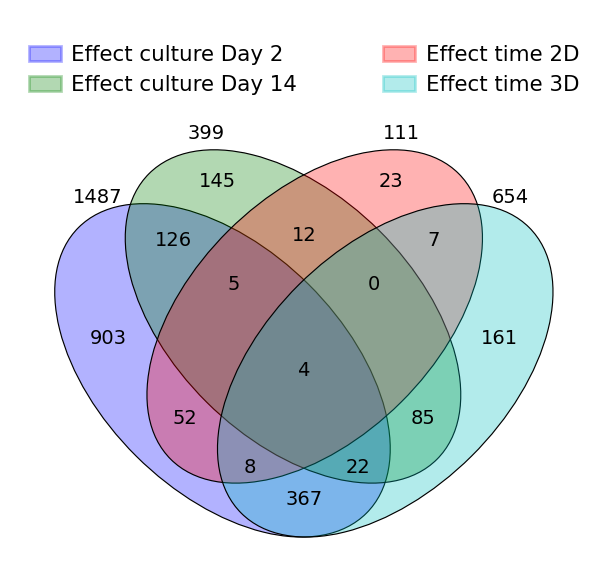

In [11]:
sets = {
    'Effect culture Day 2': set(response_genes['effect_culture_day2']),
    'Effect culture Day 14': set(response_genes['effect_culture_day14']),
    'Effect time 2D': set(response_genes['effect_time_2D']),
    'Effect time 3D': set(response_genes['effect_time_3D'])
}
    
venny4py.venny4py.venny4py(sets=sets)